# Finite Square Well Potential
Here are some plots and code related to the PHAS0004: Atoms, Stars and the Universe course as taught in 2020 to the first year students of UCL Physics and Astronomy. In this note book we are going to be looking at the finite square well potential.

In [2]:
import numpy as np  #import the numpy library as np
import matplotlib.pyplot as plt #import the pyplot library as plt
import matplotlib.style #Some style nonsense
import matplotlib as mpl #Some more style nonsense
import math  #Import math so that math.pi can be used
import scipy.constants #Import scipy.constants so that hbar and electron_mass can be used
from scipy.optimize import fsolve # Import fsolve for the numerical solving
from scipy import integrate # Import integrate for numerical integration


#Set default figure size
#mpl.rcParams['figure.figsize'] = [12.0, 8.0] #Inches... of course it is inches
mpl.rcParams["legend.frameon"] = False #Turn off the box around the legend
mpl.rcParams['figure.dpi']=150 # dots per inch

## Finite square well potential

During the course we discussed the infinite square well potential, which had a potential of the form
$$V(x)=\begin{cases}
0 & \text{if } 0 \leq x \leq L \\
U & \text{otherwise}
\end{cases}$$

Now we will try and plot this function..

In [2]:
#Define a function which will operate on an array of x values all at once
def finiteV(x):
    conds = [x < 0, (x >= 0) & (x <= 1), x > 1]   #The three regions of x
    funcs = [lambda x: 1000, lambda x: 0,  # #0 in the middle and 1000 outsides
            lambda x: 1000]  #the lambda keyword is allowing us to define a quick function
    return np.piecewise(x, conds, funcs)  #Now do the piecewise calculation and return it
    
    

Text(-0.25, 300, 'Region A')

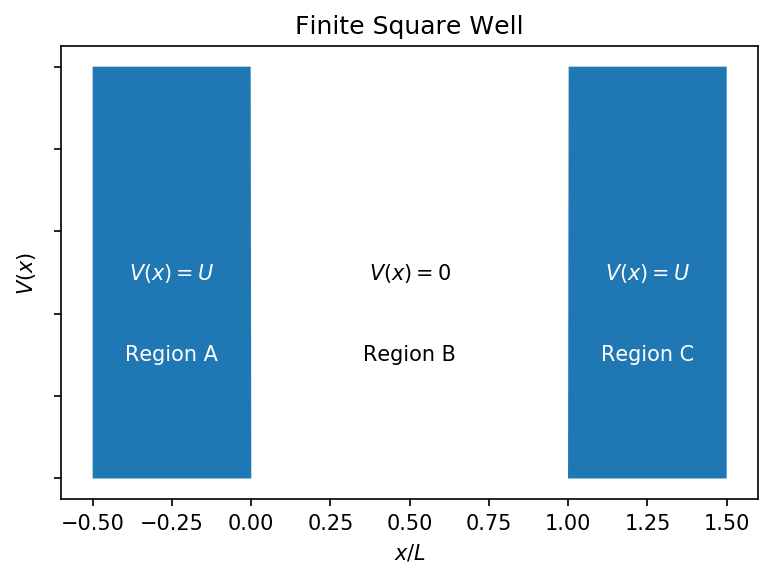

In [3]:
#Now let's plot our potential
fig, ax = plt.subplots()  #I like to make plots using this silly fig,ax method but plot how you like
x = np.linspace(-0.5, 1.5, 1000) # 1000 x values between -0.5 and 1.5
ax.fill_between(x,finiteV(x),0)   #Fill between the V(x) values and 0
ax.set_title(r"Finite Square Well")  #Set the plot title
ax.set_xlabel("$x / L$")  # Set the x-axis label
ax.set_ylabel("$V(x)$") # Set the y-axis label
ax.set_yticklabels([]) #Remove the y-axis label as w
ax.annotate(r'$V(x)=U$', xy=(1.25,500), xycoords="data", #Label on right-hand side
                  va="center", ha="center",c="w")  #horizontal and vertical alignment and color=white

ax.annotate(r'$V(x)=0$', xy=(0.5,500), xycoords="data", #Label in middle side
                  va="center", ha="center") #horizontal and vertical alignment 

ax.annotate(r'$V(x)=U$', xy=(-0.25,500), xycoords="data", #Label on left-hand side
                  va="center", ha="center",c="w")  #horizontal and vertical alignment and color=white


ax.annotate(r'Region C', xy=(1.25,300), xycoords="data", #Label on right-hand side
                  va="center", ha="center",c="w") #horizontal and vertical alignment and color=white

ax.annotate(r'Region B', xy=(0.5,300), xycoords="data", #Label in middle side
                  va="center", ha="center") #horizontal and vertical alignment 

ax.annotate(r'Region A', xy=(-0.25,300), xycoords="data", #Label on left-hand side
                  va="center", ha="center",c="w") #horizontal and vertical alignment and color=white

## TISE in the Finite Square Well  

The Time Independent Schrödinger Equation (TISE) in Regions A & C is given by:
$$ -\frac{\hbar^2}{2m} \frac{\partial^2 \psi(x)}{\partial x^2} +U \psi(x) = E \psi(x)$$
which can be rewritten as:
$$  \frac{\partial^2 \psi(x)}{\partial x^2}  = \frac{2m}{\hbar^2}\left(U-E\right) \psi(x)$$

In Region B the TISE is 
$$  \frac{\partial^2 \psi(x)}{\partial x^2}  = -\frac{2m}{\hbar^2} E \psi(x)$$





## Solutions in the finite well

There are two cases for the solution $E>U$ and $E<U$, lets start with the second one since that is more fun.
### Case: $E<U$
In this case it is convenient to define a new parameter $k_0^2 = \frac{2m}{\hbar^2}\left(U -E\right)$ so that we can write the TISE in Regions A&C as:
$$  \frac{\partial^2 \psi(x)}{\partial x^2}  = k_0^2 \psi(x)$$
The general solutions in these regions are of the form
$$\psi_A(x) = A \exp(- k_0 x) + B \exp(+ k_0 x)~~~~~~~~~~x<0$$
$$\psi_C(x) = F \exp(- k_0 x) + G \exp(+ k_0 x)~~~~~~~~~~x>L$$

We will also define another new parameter $k_1^2 =\frac{2m}{\hbar^2} E $ which lets us write the TISE in Region B as
$$ \frac{\partial^2 \psi_B(x)}{\partial x^2}  = -k_1^2 \psi_B(x) ~~~~~~~~~~ 0 \leq x \leq L$$
The general solutions in this region is of the form
$$\psi_B(x) = C \sin (k_1 x) + D \cos (k_1 x)$$

#### How many unknowns?
We have 7 unknowns, $A,B,C,D,F,G$ and the energy $E$. So lets start trying to constrain some of these variables.

Firtsly we know that our wavefunctions must remain finite everywhere if they are to be normalisable. The exponential wavefunctions have the capability of growing exponentially (as we sadly hear daily on the news). So, in region A $(x<0)$ we must set $A$ to zero to avoid an infinite wavefunction as $x\rightarrow \infty$ and in region C ($x>L$) we must set $G$ to zero to avoid an infinite wavefunction as $x\rightarrow -\infty$. This means the wavefunctions in those regions are
$$ \psi_A(x) =  B \exp(+ k_0 x)~~~~~~~~~~x<0$$
$$\psi_C(x) = F \exp(- k_0 x)~~~~~~~~~~x>L$$

#### Boundary conditions
We need to require the wavefunctions and the first derivatives of the wavefunctions to be continuous, particularly at $x=0$ and $x=L$.

##### Boundary conditions at $x=0$
$$\psi_A(0) = \psi_B(0)$$
$$B = D$$
So we can write
$$ \psi_A(x) =  D \exp(+ k_0 x)~~~~~~~~~~x<0$$
then we can take the first derivatives in all three regions
$$ \frac{\partial \psi_A(x)}{\partial x} = D k_0 \exp(+ k_0 x)$$
$$ \frac{\partial \psi_B(x)}{\partial x} = C k_1 \cos( k_1 x) - D k_1 \sin( k_1 x)$$
$$ \frac{\partial \psi_C(x)}{\partial x} = -F k_0 \exp(- k_0 x)$$
Applying the boundary condition at $x=0$ we get
$$ \frac{\partial \psi_A(0)}{\partial x} = \frac{\partial \psi_B(0)}{\partial x}$$
$$ D k_0  = C k_1 $$
$$ C = \frac{k_0}{k_1} D $$
Which allows us to write
$$\psi_B(x) = \frac{k_0}{k_1} D \sin (k_1 x) + D \cos (k_1 x)$$
$$ \frac{\partial \psi_B(x)}{\partial x} = D k_0 \cos( k_1 x) - D k_1 \sin( k_1 x)$$

So we have elimated four of the seven unknowns. But to fix the remaining ones is much more complicated.

##### Boundary conditions at $x=L$
$$\psi_B(L) = \psi_C(L)$$
$$ \frac{k_0}{k_1} D \sin (k_1 L) + D \cos (k_1 L) = F \exp(- k_0 L)$$
and
$$ \frac{\partial \psi_B(L)}{\partial x}  = \frac{\partial \psi_C(L)}{\partial x} $$
$$ D k_0 \cos( k_1 L) - D k_1 \sin( k_1 L) =  -F k_0 \exp(- k_0 L)$$

## Now it gets messy (yes even messier -- everything below here is not examinable material)
So let's try and divide the two big messy equations above
$$ \frac{\frac{k_0}{k_1} D \sin (k_1 L) + D \cos (k_1 L)}{ D k_0 \cos( k_1 L) - D k_1 \sin( k_1 L)} = \frac{F \exp(- k_0 L)}{-F k_0 \exp(- k_0 L)} $$

$$ \frac{k_0  \sin (k_1 L) +  k_1 \cos (k_1 L)}{  k_0 k_1 \cos( k_1 L) -  k_1^2 \sin( k_1 L)} = \frac{ 1}{- k_0 } $$

$$ k_0^2  \sin (k_1 L) +  k_0 k_1 \cos (k_1 L) = -k_0 k_1 \cos( k_1 L) +  k_1^2 \sin( k_1 L) $$

$$ k_0^2  \tan (k_1 L) +  k_0 k_1  = -k_0 k_1 +  k_1^2 \tan( k_1 L) $$
$$ 2 k_0 k_1 = \left(k_1^2 - k_0^2 \right)  \tan( k_1 L) $$
Now we can insert our definitions of $k_0$ and $k_1$
$$ 2 \sqrt{\frac{2m}{\hbar^2}\left(U -E\right) } \sqrt{\frac{2m}{\hbar^2} E} = \left[ \frac{2m}{\hbar^2} E - \frac{2m}{\hbar^2}\left(U -E\right) \right] \tan\left(\sqrt{\frac{2m}{\hbar^2} E} L \right) $$
$$ 2 \frac{\sqrt{\left(U-E\right)E}}{2E - U} = \tan\left(\sqrt{\frac{2m}{\hbar^2} E} L \right) $$

Now, obviously this is a somewhat terrifying mess. But if we pause for a second then we realise that on the left hand side we just have a function of $U$ and $E$, which is obvioulsy only valid for $E < U$. The right hand side is just a functon of $E$ and the particle mass, $m$ and well width $L$.

### Let's find some solutions
Obvioulsy the solutions to this equation are when the left hand side is equal to the right hand side. This equaiton has to be solved either graphically or numerically. We will illustrate both below.




In [5]:
#Define functions of E that will be the LHS and RHS of the above 

#Energy in eV... although it doesn't actually matter as long as E and U are
# in the same units as this function ends up dimensionless
def LHS(E,U):  
    return (2*np.sqrt((U-E)*E)/(2*E-U))
    
#Energy in eV, distance in m, mass in kg
def RHS(E,L,m):
    return (np.tan(np.sqrt(2*m*E*scipy.constants.eV/(scipy.constants.hbar**2))*L))
    

### Let's plot those functions
To plot these functions we need to define the size and width of our well, and also define our particle mass.
- Width = 0.5nm
- Height = 25eV
- Mass = electron mass

Since the well is only 25eV high these solutions are only valid up to E=25eV, since particles above that energy would be free particles.

(-10, 10)

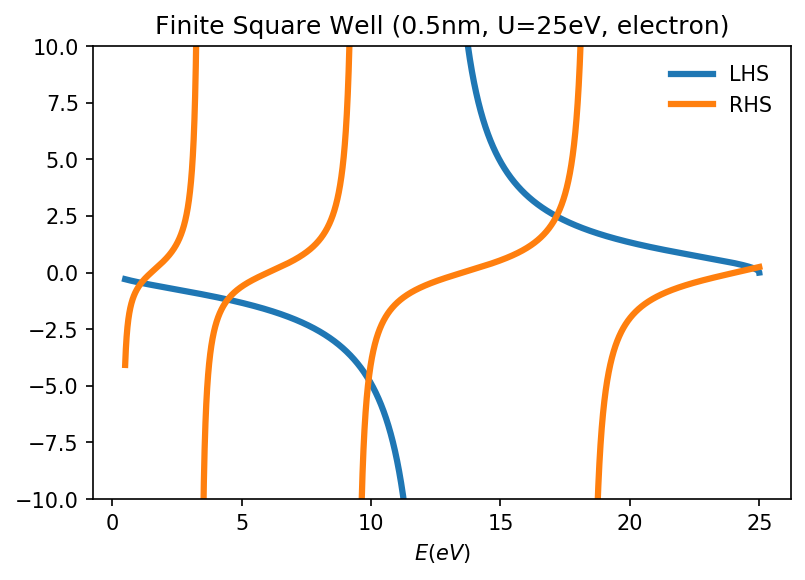

In [5]:
#Now let's LHS and RHS and see where they cross
fig, ax = plt.subplots()  #I like to make plots using this silly fig,ax method but plot how you like
eInEv = np.linspace(0.5, 25, 10000)  # 1000 E values between 0.5eV and 25eV

#Precompute the LHS and RHS to remove the poles
lhs=LHS(eInEv,25) # LHS of the equation 
lhs[:-1][np.diff(lhs) > 0] = np.nan  #Insert a not a number when it changes from -ve to +ve
rhs=RHS(eInEv,0.5e-9,scipy.constants.electron_mass) # RHS of the equation 
rhs[:-1][np.diff(rhs) < 0] = np.nan #Insert a not a number when it changes from +ve to -ve

ax.plot(eInEv,lhs,linewidth=3,label="LHS") # Plot the LHS
ax.plot(eInEv,rhs,linewidth=3,label="RHS") # Plot the RHS
ax.set_title(r"Finite Square Well (0.5nm, U=25eV, electron)") # Set the plot title
ax.set_xlabel("$E (eV)$") # Set the x-axis label
plt.legend() # Show the legend
ax.set_ylim(-10,10) # Set the y-axis range from -10 to 10

## There are just 5 solutions!
The five crossing points above are the *only* five solutions to this particular finite square well problem. We could zoom in to find out the exact crossing point or we could use some form of numerical solution.

In [6]:
#Define a function which is LHS-RHS, so when this function is zero we have our solutions
def solveMe(E,*args):  #A function with a number of arguments that will be unpacked on the next line
    U,L,m=args  # Convert the args variable into it's three sub components U, L and m
    return LHS(E,U)-RHS(E,L,m)  # return LHS-RHS

EGuess=[1,4,10,17,24]  # These are numbers from the above plot which are close to the crossing points
EList=np.zeros(len(EGuess)) # Make an empty array to fill with the energies of allowed states
for i in range(len(EGuess)):  # Loop from i = 0 to i< length(EGuess)  [currently 5]
    Et = fsolve(solveMe, EGuess[i], args=(25,0.5e-9,scipy.constants.electron_mass)) # Find root where LHS=RHS
    EList[i]=Et # Place ROOT into Elist
print(EList)  # Print the 5 allowed energies of bound states

[ 1.12293787  4.46186314  9.9075225  17.16577703 24.78410841]


## What about the wave functions?

Having our numerical results for the energy we can plot our wavefunctions as a function of position $x$.



In [3]:
#Define a function which will piecewise return the finite square well solutions
def finitePsi(x,D,E,U,L,m):
    k0=np.sqrt(2*m*(U-E)*scipy.constants.eV/(scipy.constants.hbar**2))  #k_0=sqrt(2m(U-E)/hbar^2)
    k1=np.sqrt(2*m*E*scipy.constants.eV/(scipy.constants.hbar**2)) #k_1=sqrt(2mE/hbar^2)
    F=((k0/k1)*D*np.sin(k1*L)+D*np.cos(k1*L))/np.exp(-k0*L) # F is a mess, see above
    
    conds = [x < 0, (x >= 0) & (x <= L), x > L]   #The three regions of x
    funcs = [lambda x: D*np.exp(k0*x), #Wavefunction in region A
             lambda x: (k0*D*np.sin(k1*x)/k1) + D*np.cos(k1*x),  #Wavefunction in region B
            lambda x: F*np.exp(-k0*x)]  #Wavefunction in region C
    return np.piecewise(x, conds, funcs)  #Now do the piecewise calculation and return it
    
    
#The PDF is just the square of the waveform
def finitePDF(x,D,E,U,L,m):
    return finitePsi(x,D,E,U,L,m)**2
    

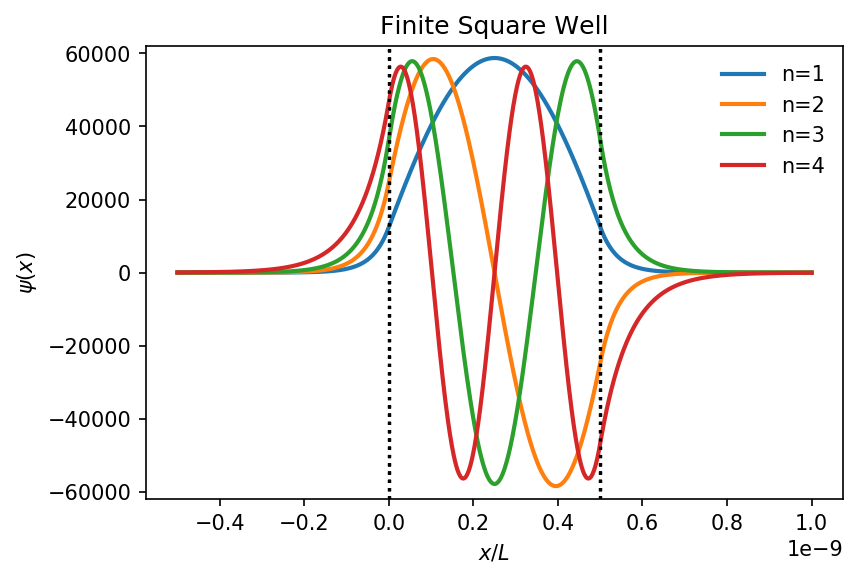

In [23]:
#Now let's plot our first 4 probability density functions
fig, ax = plt.subplots()  #I like to make plots using this silly fig,ax method but plot how you like
x = np.linspace(-0.5e-9, 1e-9, 1000) #1000 x-values from -0.5nm to 1nm


scaleList=[]
for i in range(4):
    tot,err=integrate.quad(finitePDF,-1e-9,1.5e-9,args=(1.,EList[i],25,0.5e-9,scipy.constants.electron_mass))
    scaleList.append(np.sqrt(tot))
    ax.plot(x,finitePsi(x,1./scaleList[i],EList[i],25,0.5e-9,scipy.constants.electron_mass),linewidth=2,label="n="+str(i+1))
    ax.axvline(x=0,linestyle=":",color="black")
    ax.axvline(x=0.5e-9,linestyle=":",color="black")
    ax.set_ylim(-62000,62000)

ax.set_title(r"Finite Square Well")
ax.set_xlabel("$x / L$")
ax.set_ylabel("$\psi(x)$")
plt.legend()


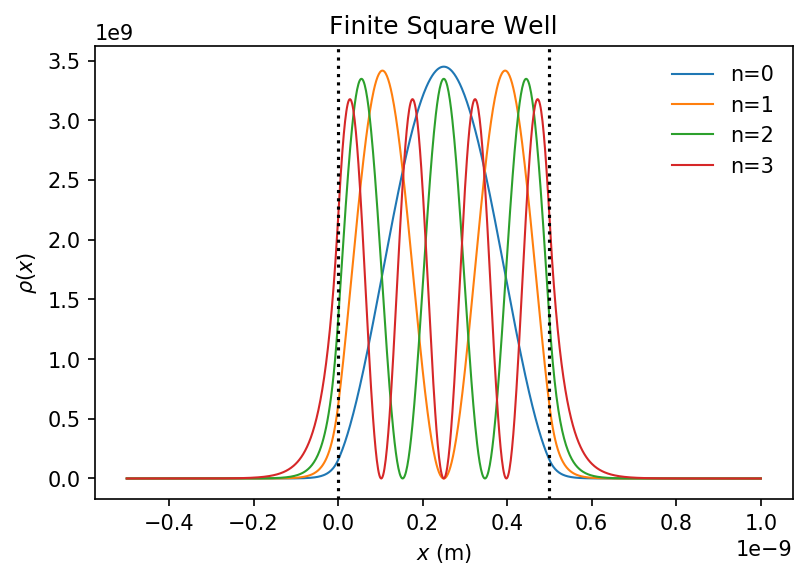

In [25]:
#Now let's plot our first 4 probability density functions
fig, ax = plt.subplots()  #I like to make plots using this silly fig,ax method but plot how you like
x = np.linspace(-0.5e-9, 1.0e-9, 1000)

for i in range(4):
    ax.plot(x,finitePDF(x,1./scaleList[i],EList[i],25,0.5e-9,scipy.constants.electron_mass),linewidth=1,label="n="+str(i))


ax.set_title(r"Finite Square Well")
ax.set_xlabel(r"$x$ (m)")
ax.set_ylabel(r"$\rho(x)$")
ax.axvline(x=0,linestyle=":",color="black")
ax.axvline(x=0.5e-9,linestyle=":",color="black")
plt.legend()



### Case: $E>U$   (Mathematics non-examinable material)
We should also, for completeness, touch upon the case where the energy of the particle exceeds the height of the potential well.

The TISE in this region can be written as in terms of $k_2^2=\frac{2m(E-U)}{\hbar^2}$
$$  \frac{\partial^2 \psi(x)}{\partial x^2}  = - k_2^2 \psi(x)$$

The full solution in this region needs complex numbers and will have to wait for next years course. But some observations
- The solutions will be sinusoidal everywhere
- The wavelength will be longer outside the well (corresponding to lower kinetic energy)
- The solutions are not normalisable (since they are like free particle de Broglie solutions and stretch to infinite)
- This means we can't calculate the probability distribution function

The general solutions in these regions are of the form, where we have used the fact that a linear combination of sine and cosine functions is itself a sine function with a different amplitude and phase (or in fact a cosine function since a cosine function is just a sine function with a phase shift).
$$\psi_A(x) = A \sin(k_2 x + \phi_A)~~~~~~~~~~x<0$$
$$\psi_B(x) = B \sin(k_1 x + \phi_B)~~~~~~~~~~0<x<L$$
$$\psi_C(x) = C \sin(k_2 x + \phi_C) ~~~~~~~~~~x>L$$

In the Region A lets assume this is our input wavefunction and we can pick $A=1$ and $\phi_A=0$. The boundary conditions at $x=0$
$$\psi_B(0)=\psi_C(0)$$
$$0 = B \sin(\phi_B)$$
So $\phi_B=n\pi$, but lets pick $\phi_B=0$ for simplicity.
$$ \frac{\partial \psi_B(L)}{\partial x}  = \frac{\partial \psi_C(L)}{\partial x} $$
$$ k_2 = k1 B$$
So $$B=k_2/k_1$$


The boundary conditions at $x=L$ five
$$\psi_B(L)=\psi_C(L)$$
$$ \frac{k_2}{k_1} \sin(k_1 L) = C\sin(k_2 L + \phi_C)$$
$$ k_2 \cos(k_1 L) = C k_2 \cos(k_2 L + \phi_C)$$
So dividing the second equation by $k_2$ and squaring and adding them:
$$ \frac{k_2^2}{k_1^2}  \sin^2(k_1 L) + \cos^2(k_1 L) = C^2  \cos^2(k_2 L + \phi_C) + C^2 \sin^2(k_2 L + \phi_C)$$
$$ \frac{k_2^2}{k_1^2}  \sin^2(k_1 L) + \cos^2(k_1 L) = C^2 $$

$$ C = \sqrt{  \frac{k_2^2}{k_1^2} \sin^2(k_1 L) +  \cos^2(k_1 L)}  $$

Whilst dividing the equations would give
$$ \frac{1}{k_1} \tan(k_1 L) = \frac{1}{k_2} \tan(k_2 L + \phi_C)$$
$$ \phi_C=\arctan\left[\frac{k_2}{k_1} \tan(k_1 L)\right] -  k_2 L$$

In [27]:
#Define a function which will piecewise return the finite square well solutions
def finitePsiUnbound(x,E,U,L,m):
    k2=np.sqrt(2*m*(E-U)*scipy.constants.eV/(scipy.constants.hbar**2))
    k1=np.sqrt(2*m*E*scipy.constants.eV/(scipy.constants.hbar**2))
    B=k2/k1
    C=np.sqrt((k2*np.sin(k1*L)/k1)**2 + np.cos(k1*L)**2)
    phiC=np.arctan(k2*np.tan(k1*L)/k1)-k2*L 
    
    conds = [x < 0, (x >= 0) & (x <= L), x > L]   #The three regions of x
    funcs = [lambda x: np.sin(k2*x), 
             lambda x: B*np.sin(k1*x),  
            lambda x: C*np.sin(k2*x+phiC)]  #the lambda keyword is allowing us to define a quick function
    return np.piecewise(x, conds, funcs)  #Now do the piecewise calculation and return it

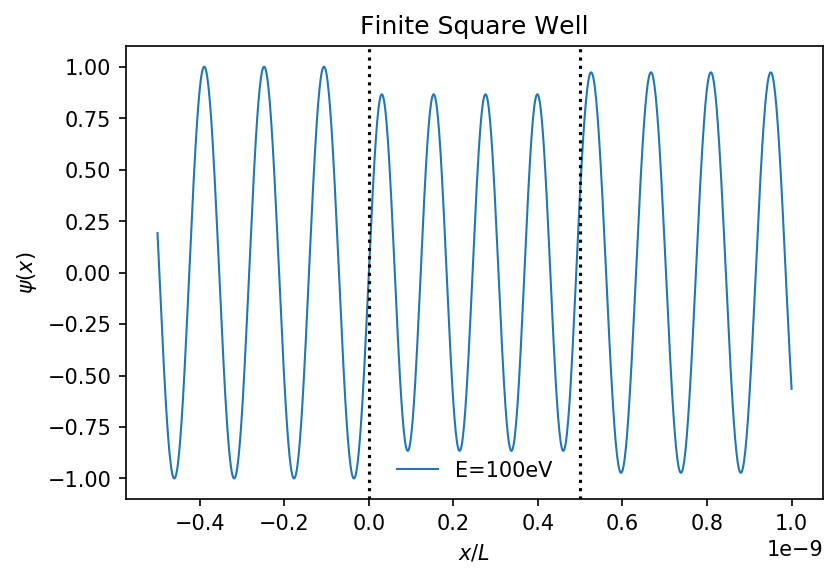

In [28]:
fig, ax = plt.subplots()  #I like to make plots using this silly fig,ax method but plot how you like
x = np.linspace(-0.5e-9, 1e-9, 1000)
eIneV=100
ax.plot(x,finitePsiUnbound(x,eIneV,25,0.5e-9,scipy.constants.electron_mass),linewidth=1,label="E="+str(eIneV)+"eV")
ax.set_title(r"Finite Square Well")
ax.set_xlabel("$x / L$")
ax.set_ylabel("$\psi(x)$")
ax.axvline(x=0,linestyle=":",color="black")
ax.axvline(x=0.5e-9,linestyle=":",color="black")
plt.legend()


### Final thoughts

The above plot illustrates one of the features of the finite square well. As you change the energy (always keeping in mind $E>U=25$eV) you see the amplitude of the wave in the right region is sometimes smaller than the amplitude on the left. This is particularly noticeable as $E-U \rightarrow 0$ 

This is because some of the incoming particles on the left reflect off the potential well (but to model this properly we need to use complex numbers). This effect is similar to quantum tunnelling.